<a href="https://colab.research.google.com/github/LuciaMottet/2024_Intro_Python/blob/main/ML_EES/IP/W2_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Ocean Floats Data Analysis

**Learning Objectives**

*    Creating new arrays using `linspace` and `arange`
*    Computing basic formulas with `numpy` arrays
*    Loading data from `.npy` files
*    Performing reductions (e.g. `mean`, `std` on `numpy` arrays)
*    Making 1D line plots
*    Making scatterplots
*    Annotating plots with titles and axes

In this problem, we use real data from ocean profiling floats. [ARGO](http://www.argo.ucsd.edu/) floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. [ARGO](http://www.argo.ucsd.edu/) floats collect one “profile” (a set of messurements at different depths or “levels”).

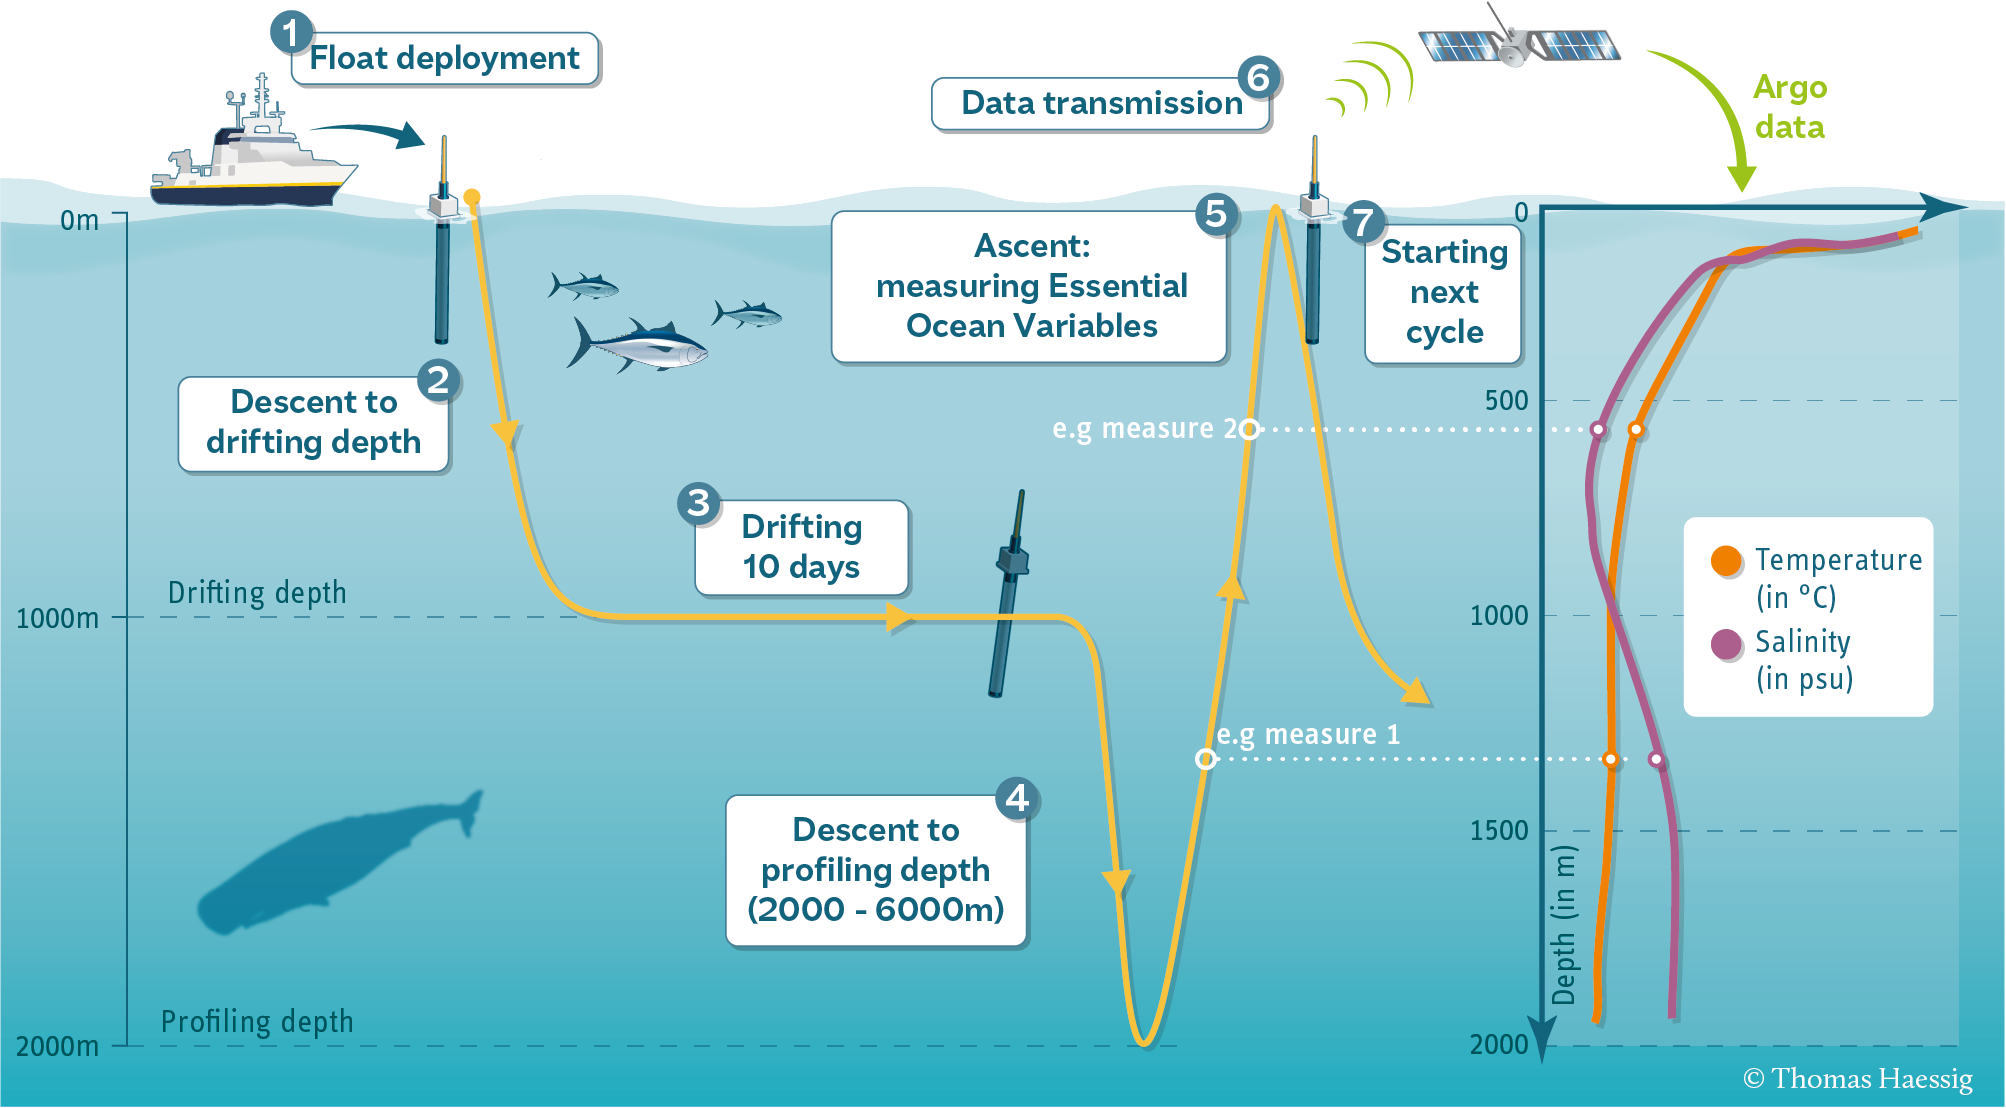


Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let’s start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise. The following code will give you a list of `.npy` files that you can open in the next step.

In [19]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy']

In [20]:
import numpy as np

**Q1) Load each data file as a `numpy` array.**

You can use whatever names you want for your arrays, but we recommend:

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

Hint 1: Look at the file name (the items in `files`) to know which files corresponds to which variable.

Hint 2: Check out the documentation for [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Display the names of the items in files here

In [21]:
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy']

Then, load the files as `numpy` arrays, for instance using list comprehension

In [27]:
P,date,lat,S,levels,lon,T = [np.load(files[i]) for i in range(7)]
#afficher
print("Pressure:", P)
print("Date:", date)
print("Latitude:", lat)
print("Salinity:", S)
print("Levels:", levels)
print("Longitude:", lon)
print("Temperature:", T)

Pressure: [[   6.80000019    6.0999999     6.5        ...    7.0999999
     7.20000029    6.5       ]
 [  10.69999981   10.59999943   10.39999962 ...   10.79999924
    11.09999943   10.39999962]
 [  15.69999981   14.09999943   14.89999962 ...   15.89999962
    15.59999943   15.89999962]
 ...
 [1900.60009766 1900.         1900.19995117 ... 1899.70007324
  1900.40002441 1899.80004883]
 [1949.90002441 1950.         1949.89990234 ... 1950.59997559
  1950.20007324 1949.70007324]
 [1999.30004883 1998.         1998.5        ...           nan
  2000.40002441           nan]]
Date: ['2012-07-13T22:33:06.019200000' '2012-07-23T22:54:59.990400000'
 '2012-08-02T22:55:52.003200000' '2012-08-12T23:08:59.971200000'
 '2012-08-22T23:29:01.968000000' '2012-09-01T23:17:38.976000000'
 '2012-09-12T02:59:18.960000000' '2012-09-21T23:18:37.036800000'
 '2012-10-02T03:00:17.971200000' '2012-10-11T23:13:27.984000000'
 '2012-10-22T02:50:32.006400000' '2012-10-31T23:36:39.974400000'
 '2012-11-11T02:40:46.041600000

**Q2) Recreate the `level` array using `np.arange` and `np.linspace`**

Hints:

*   The documentation for `np.arange` is [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
*   The documentation for `np.linspace` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   The documentation for `np.testing.assert_equal` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Display the `level` array

In [28]:
print(levels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recreate the `level` array using `np.arange` and call it `level_arange`

In [31]:
level_arange = np.arange(0,78)
print(level_arange)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Check that `level` and `level_arange` are equal using `np.testing.assert_equal`

In [32]:
np.testing.assert_equal(levels,level_arange)

Recreate the `level` array using `np.linspace` and call it `level_linspace`

In [35]:
level_linspace = np.linspace(0,77,78)
print(level_linspace)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77.]


Check that `level` and `level_linspace` are equal using `np.testing.assert_equal`

In [39]:
np.testing.assert_equal(levels,level_linspace)

**Q3) Examine the shapes of `T`, `S` and `P` compared to `lon`, `lat`, `date` and `level`. How do you think they are related?**

Hint: Check out the [NDArrays subsection](#NDArrays)

Display the shapes of all loaded variables

In [41]:
print(T.shape,
S.shape,
P.shape,
lon.shape,
lat.shape,
date.shape,
levels.shape)

(78, 75) (78, 75) (78, 75) (75,) (75,) (75,) (78,)


In [42]:
#shapes of T, S and P show 2 dimensions compared to lon, lat, date and level, that show 1 dimension

Based on the shapes, which dimensions do you think are shared among the arrays?

**Q4) Based on the formula below, calculate the seawater density `relative_density`, relative to pure water, as a function of the temperature, the salinity, and the pressure.**

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

where:

*    The densities $\rho$ and $ρ_{Pure\ Water}$ are in units $kg/m^{3}$.
*    The constants $a$, $b$, and $c$ are provided below.
*    The function to calculate the conservative temperature $\Theta$ (in units Celcius) from temperature, salinity, and pressure is provided below.
*    The temperature $T$ is in units Celcius.
*    The salinity $S$ is in units $g/kg$.
*    The pressure $p$ is in units $dbar$.

Hint: The loaded `numpy` arrays `temperature`, `salinity`, and `pressure` already have the right units and no conversion is needed.

Sources:

1) [*Roquet, Fabien, et al. "Defining a simplified yet “realistic” equation of state for seawater." Journal of Physical Oceanography 45.10 (2015): 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). [(License)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Below are the constants a, b, and c:

In [43]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Let's import the library [`gsw`](https://teos-10.github.io/GSW-Python/) that contains the function `CS_from_t`to calculate the conservative temperature $\Theta$ from temperature, salinity, and pressure.

In [44]:
!pip install gsw
from gsw import CT_from_t

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 20.9 MB/s eta 0:00:00


Now it's all up to you. Here's the equation to avoid having to scroll back up:

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculate the conservative temperature

Hint: use [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [47]:
constemp = CT_from_t(S,T,P)

Calculate the `relative density` using the equation above

In [50]:
relative_density = a*S + b*constemp  + c*constemp**2

**Q4) Make a plot for each column of data in `T`, `S`, `P`, and
`relative_density` (four plots)**

For this question, we have to use the [Pyplot interface](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) of the [Matplotlib library](https://matplotlib.org/) for visualization even if we have not covered it extensively in class yet. But fear not as we provide easy-to-follow instructions below. 😊

The first step is to import Pyplot. Simply execute the code below.

In [51]:
import matplotlib.pyplot as plt

Then, we will plot variables as a function of the ocean depth, `level`. Simply read the documentation [at this link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to infer the correct syntax. Label your axes using `plt.xlabel` and `plt.ylabel`, and add a title using `plt.title`.

Hint: The vertical scale should use the `level` data to be consistent with oceanographic conventions.

Hint 2: Each plot should have a line for each column of data. It will look messy, like the plot below:

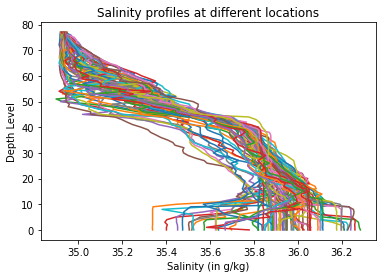

Text(0.5, 1.0, 'salinity profile in function of depth')

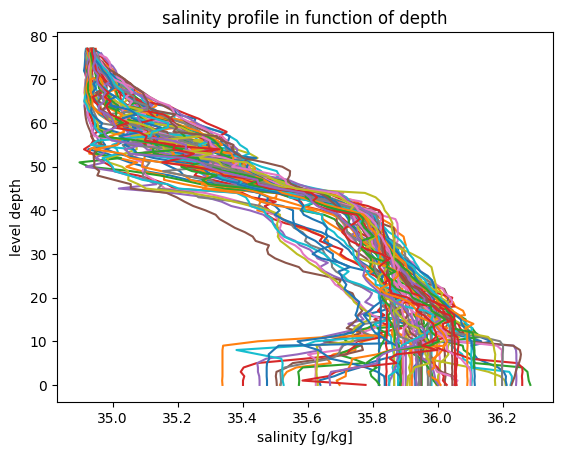

In [61]:
plt.plot(S,levels); # The semi-colon prevents printing the line objects
plt.xlabel('salinity [g/kg]') # Takes a string as argument
plt.ylabel('level depth')
plt.title('salinity profile in function of depth')

Make more plots below:

Text(0.5, 1.0, 'temperature profile in function of depth')

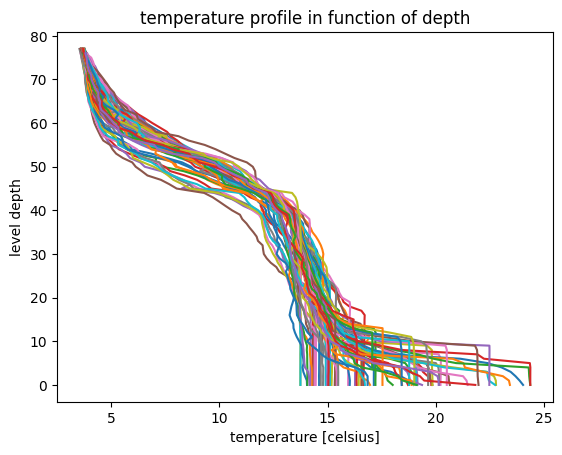

In [62]:
plt.plot(T,levels); # The semi-colon prevents printing the line objects
plt.xlabel('temperature [celsius]') # Takes a string as argument
plt.ylabel('level depth')
plt.title('temperature profile in function of depth')

Text(0.5, 1.0, 'pressure profile in function of depth')

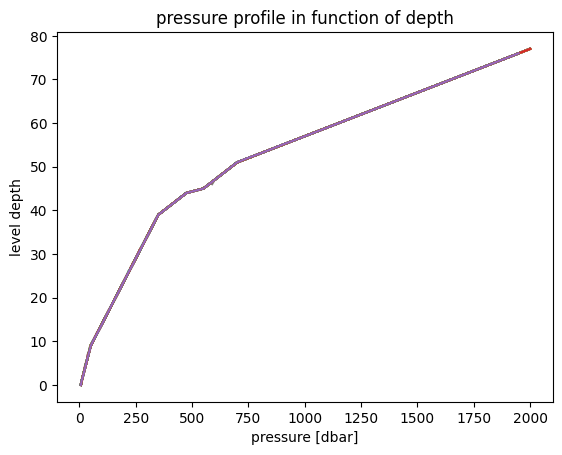

In [63]:
plt.plot(P,levels); # The semi-colon prevents printing the line objects
plt.xlabel('pressure [dbar]') # Takes a string as argument
plt.ylabel('level depth')
plt.title('pressure profile in function of depth')

Text(0.5, 1.0, 'relative density profile in function of depth')

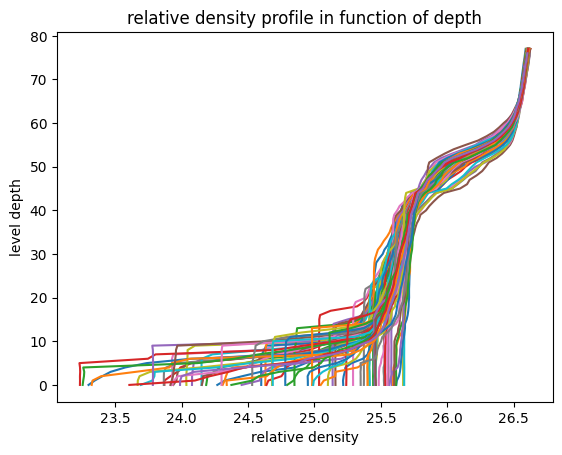

In [64]:
plt.plot(relative_density,levels); # The semi-colon prevents printing the line objects
plt.xlabel('relative density') # Takes a string as argument
plt.ylabel('level depth')
plt.title('relative density profile in function of depth')

**Q5) Compute the mean and standard deviation of each of `T`, `S`, `P`, and `seawater_density` at each depth in `level`.**

Hint: You may want to read the documentation at [this link](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [this link](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Hint 2: You can check that you took the mean and standard deviations along the correct axes by checking the `shape` of your results.

Compute the means...

In [67]:
MS = np.mean(S,axis=1)
MS.shape

(78,)

In [69]:
MT = np.mean(T,axis=1)
MT.shape
MP = np.mean(P,axis=1)
MP.shape
Mrd = np.mean(relative_density,axis=1)
Mrd.shape

(78,)

... and the standard deviations.

In [76]:
sdS = np.std(S,axis=1)
sdS.shape
sdT = np.std(T,axis=1)
sdP = np.std(P,axis=1)
sdrd = np.std(relative_density,axis=1)

Check that they have the same shape as your vertical level `lev` coordinate:

In [77]:
np.testing.assert_equal(MS.shape,levels.shape)

np.testing.assert_equal(sdS.shape,levels.shape)

**Q6) Now make similar plots, but show only the mean `T`, `S`, `P`, and `seawater_density` at each depth. Show error bars on each plot using the standard deviations.**

Hint: If you are feeling adventurous, you can directly use the [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function.

Hint 2: You should get plots similar to the one below

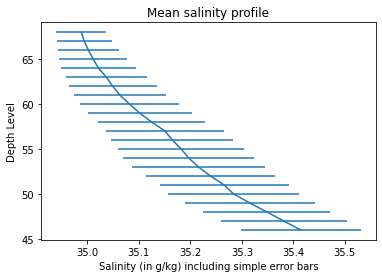

(45.0, 69.0)

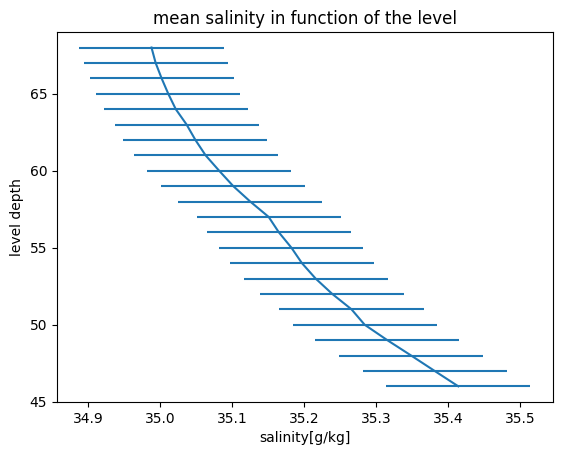

In [86]:
plt.errorbar(MS,levels,xerr=0.1)
plt.xlabel('salinity[g/kg]')
plt.ylabel('level depth')
plt.title('mean salinity in function of the level')
plt.ylim(45,69)

Three more plots and we'll be all set! 🙂

(45.0, 69.0)

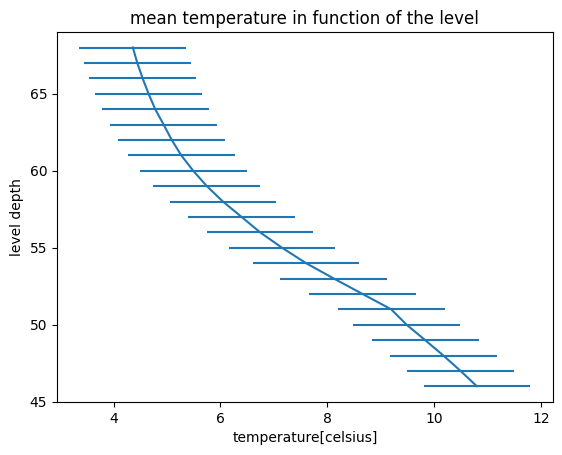

In [85]:
plt.errorbar(MT,levels,xerr=1)
plt.xlabel('temperature[celsius]')
plt.ylabel('level depth')
plt.title('mean temperature in function of the level')
plt.ylim(45,69)

(45.0, 69.0)

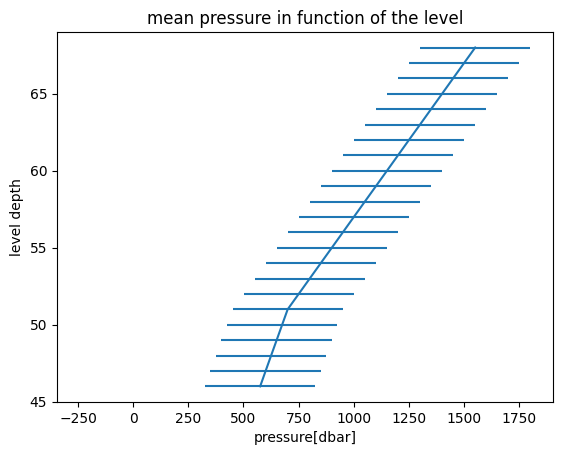

In [90]:
plt.errorbar(MP,levels,xerr=250)
plt.xlabel('pressure[dbar]')
plt.ylabel('level depth')
plt.title('mean pressure in function of the level')
plt.ylim(45,69)

(45.0, 69.0)

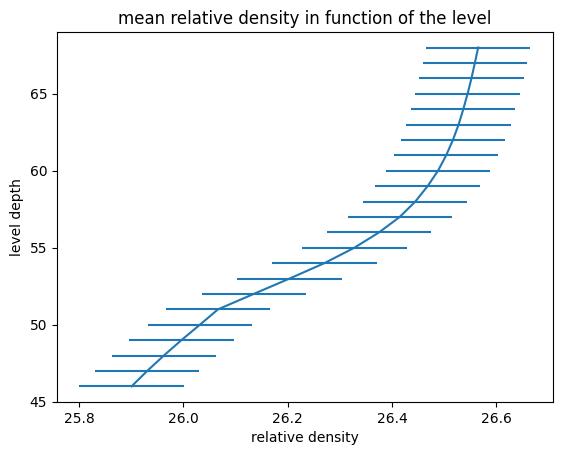

In [92]:
plt.errorbar(Mrd,levels,xerr=0.1)
plt.xlabel('relative density')
plt.ylabel('level depth')
plt.title('mean relative density in function of the level')
plt.ylim(45,69)

**Q7) Account For Missing Data**

The profiles contain many missing values. These are indicated by the special “Not a Number” value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes `NaN`. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

Hint: Links to the [`np.nanmean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and the [`np.nanstd` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculate the means below ignoring the missing values. We trust that you can now come up with the full syntax yourself 😎

In [93]:
MS = np.nanmean(S,axis=1)
MT = np.nanmean(T,axis=1)
MP = np.nanmean(P,axis=1)
Mrd = np.nanmean(relative_density,axis=1)

Similarly, recalculate the standard deviations ignoring the missing values.

In [94]:
sdS = np.nanstd(S,axis=1)
sdT = np.nanstd(T,axis=1)
sdP = np.nanstd(P,axis=1)
sdrd = np.nanstd(relative_density,axis=1)

**Q8) Create a scatter plot of the longitudinal (`lon`) and latitudinal (`lat`) coordinates of the ARGO floats.**

Again, we have not discussed it in the tutorial, but there is a really convenient scatter plot function called [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) provided by the Pyplot interface.

Bonus: Label your figure using `plt.xlabel`, `plt.ylabel`, and `plt.title`.

Bonus 2: Increase the fontsize of your labels by adding a `fontsize=` argument to the label functions.

Bonus 3: Make your scatter plot beautiful by changing the arguments of [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listed in the documentation, for example `s=`.

(45.0, 69.0)

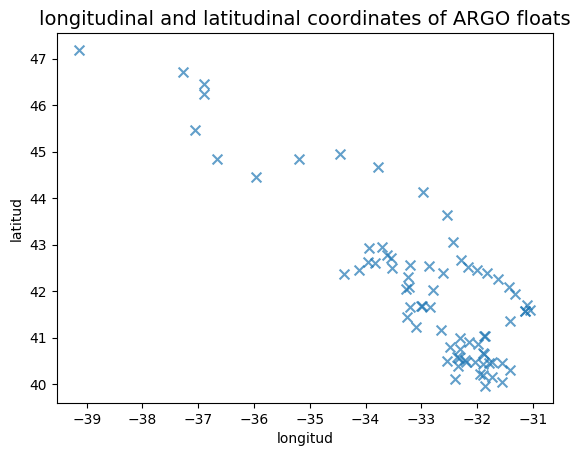

In [102]:
plt.scatter(lon,lat, s=50, marker ='x', alpha=0.7)
plt.xlabel('longitud', fontsize= 10)
plt.ylabel('latitud', fontsize= 10)
plt.title('longitudinal and latitudinal coordinates of ARGO floats', fontsize= 14)
___ # Fancy bonuses
___ # More fancy bonuses